# WeatherPy


In [1]:
# Dependencies
import requests as req
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from citipy import citipy
import time

In [2]:
# Google API Key
gkey = "6531fb771bd4c6120244bdacb4b0a890"

In [3]:
# Create random numbers for latitudes
latitude = np.random.uniform(low = -90, high = 90,size = 2000)
# latitude

# Create random numbers for longitudes
longitude = np.random.uniform(low = -180, high = 180,size = 2000)
# longitude

# Zip longitude and latidude arrays to get the coordinates
coordinates = list(zip(latitude, longitude))
# coordinates

# Generate Cities List

In [4]:
# Create an empty list of world cities and repective countries
WorldCities = []
Countries = []

# Find the nearest city corresponding to the above coordinates
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    name = citipy.nearest_city(lat, lon).city_name
    country_code = citipy.nearest_city(lat, lon).country_code
    WorldCities.append(name)
    Countries.append(country_code)
WorldCities_data = pd.DataFrame({"City":WorldCities, "Country":Countries})  

# Drop any duplicate values
WorldCities_data = WorldCities_data.drop_duplicates('City')

# Visualize the data frame
WorldCities_data.head()

,City,Country
0,saint-augustin,ca
1,mataura,pf
2,nantucket,us
3,ushuaia,ar
4,beringovskiy,ru


In [5]:
# Add columns to the data frame
WorldCities_data["Lat"] = ""
WorldCities_data["Lon"] = ""
WorldCities_data["Date"] = ""
WorldCities_data["Humidity"] = ""
WorldCities_data["Max Temp"] = ""
WorldCities_data["Wind Speed"] = ""
WorldCities_data["Cloudiness"] = ""

# Visualize the data frame
WorldCities_data.head()

,City,Country,Lat,Lon,Date,Humidity,Max Temp,Wind Speed,Cloudiness
0,saint-augustin,ca,,,,,,,
1,mataura,pf,,,,,,,
2,nantucket,us,,,,,,,
3,ushuaia,ar,,,,,,,
4,beringovskiy,ru,,,,,,,


# Perform API Calls

In [6]:
# Set the initial row count to zero
row_count = 0

print("**********************")
print("BEGINNING DATA RETRIEVAL")
print("**********************")

# Loop through the cities and perform API Calls
for index, row in WorldCities_data.iterrows():
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&appid=%s" %(row["City"], gkey)
    response = req.get(target_url).json()
    print("----------------------")
    print("Now retrieving city #%s: %s" % (row_count + 1, WorldCities_data.loc[index]["City"]))
    print(target_url)
    row_count += 1
    
    try:     
        WorldCities_data.set_value(index, "Lat", response["coord"]["lat"])
        WorldCities_data.set_value(index, "Lon", response["coord"]["lon"])
        WorldCities_data.set_value(index, "Date", response["dt"])
        WorldCities_data.set_value(index, "Humidity", response["main"]["humidity"])
        WorldCities_data.set_value(index, "Max Temp", response["main"]["temp_max"])
        WorldCities_data.set_value(index, "Wind Speed", response["wind"]["speed"])
        WorldCities_data.set_value(index, "Cloudiness", response["clouds"]["all"])
           
    except:
        print("Missing details... skip.")
        
    if row_count % 50 == 0:
        print("**********************")
        print("PAUSE FOR 30 SECONDS")
        print("**********************")
        time.sleep(30)
        
print("**********************")
print("DATA RETRIEVAL COMPLETE")
print("**********************")



**********************
BEGINNING DATA RETRIEVAL
**********************
----------------------
Now retrieving city #1: saint-augustin
http://api.openweathermap.org/data/2.5/weather?q=saint-augustin&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #2: mataura
http://api.openweathermap.org/data/2.5/weather?q=mataura&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #3: nantucket
http://api.openweathermap.org/data/2.5/weather?q=nantucket&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #4: ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #5: beringovskiy
http://api.openweathermap.org/data/2.5/weather?q=beringovskiy&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #6: cape town
http://api.openweathermap.org/data/2.5/weather?q=cape town&appid=6531fb771bd4c6120244bdac

----------------------
Now retrieving city #53: kodiak
http://api.openweathermap.org/data/2.5/weather?q=kodiak&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #54: kall
http://api.openweathermap.org/data/2.5/weather?q=kall&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #55: yellowknife
http://api.openweathermap.org/data/2.5/weather?q=yellowknife&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #56: meadow lake
http://api.openweathermap.org/data/2.5/weather?q=meadow lake&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #57: port elizabeth
http://api.openweathermap.org/data/2.5/weather?q=port elizabeth&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #58: la libertad
http://api.openweathermap.org/data/2.5/weather?q=la libertad&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #59: jamestown


----------------------
Now retrieving city #106: nemuro
http://api.openweathermap.org/data/2.5/weather?q=nemuro&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #107: trelew
http://api.openweathermap.org/data/2.5/weather?q=trelew&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #108: payo
http://api.openweathermap.org/data/2.5/weather?q=payo&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #109: lebu
http://api.openweathermap.org/data/2.5/weather?q=lebu&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #110: sambava
http://api.openweathermap.org/data/2.5/weather?q=sambava&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #111: chuy
http://api.openweathermap.org/data/2.5/weather?q=chuy&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #112: lilongwe
http://api.openweathermap.org/data/2.5/weather

----------------------
Now retrieving city #159: thompson
http://api.openweathermap.org/data/2.5/weather?q=thompson&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #160: nouadhibou
http://api.openweathermap.org/data/2.5/weather?q=nouadhibou&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #161: saint anthony
http://api.openweathermap.org/data/2.5/weather?q=saint anthony&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #162: kruisfontein
http://api.openweathermap.org/data/2.5/weather?q=kruisfontein&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #163: vangaindrano
http://api.openweathermap.org/data/2.5/weather?q=vangaindrano&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #164: port augusta
http://api.openweathermap.org/data/2.5/weather?q=port augusta&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retri

----------------------
Now retrieving city #211: manhumirim
http://api.openweathermap.org/data/2.5/weather?q=manhumirim&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #212: toliary
http://api.openweathermap.org/data/2.5/weather?q=toliary&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #213: itaituba
http://api.openweathermap.org/data/2.5/weather?q=itaituba&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #214: abapo
http://api.openweathermap.org/data/2.5/weather?q=abapo&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #215: meulaboh
http://api.openweathermap.org/data/2.5/weather?q=meulaboh&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #216: farmington
http://api.openweathermap.org/data/2.5/weather?q=farmington&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #217: mao
http://api.openwe

----------------------
Now retrieving city #265: tecoanapa
http://api.openweathermap.org/data/2.5/weather?q=tecoanapa&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #266: pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?q=pangkalanbuun&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #267: ust-kuyga
http://api.openweathermap.org/data/2.5/weather?q=ust-kuyga&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #268: hauge
http://api.openweathermap.org/data/2.5/weather?q=hauge&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #269: pryazha
http://api.openweathermap.org/data/2.5/weather?q=pryazha&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #270: mugur-aksy
http://api.openweathermap.org/data/2.5/weather?q=mugur-aksy&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #271: arraial do 

----------------------
Now retrieving city #317: mullovka
http://api.openweathermap.org/data/2.5/weather?q=mullovka&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #318: barabai
http://api.openweathermap.org/data/2.5/weather?q=barabai&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #319: aksarka
http://api.openweathermap.org/data/2.5/weather?q=aksarka&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #320: redmond
http://api.openweathermap.org/data/2.5/weather?q=redmond&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #321: wulanhaote
http://api.openweathermap.org/data/2.5/weather?q=wulanhaote&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #322: grand centre
http://api.openweathermap.org/data/2.5/weather?q=grand centre&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #323: klaksvik
http:/

----------------------
Now retrieving city #370: saleaula
http://api.openweathermap.org/data/2.5/weather?q=saleaula&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #371: bethel
http://api.openweathermap.org/data/2.5/weather?q=bethel&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #372: wenling
http://api.openweathermap.org/data/2.5/weather?q=wenling&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #373: ushtobe
http://api.openweathermap.org/data/2.5/weather?q=ushtobe&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #374: christchurch
http://api.openweathermap.org/data/2.5/weather?q=christchurch&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #375: faya
http://api.openweathermap.org/data/2.5/weather?q=faya&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #376: terrenate
http://api.openweat

----------------------
Now retrieving city #424: emirdag
http://api.openweathermap.org/data/2.5/weather?q=emirdag&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #425: san pietro in casale
http://api.openweathermap.org/data/2.5/weather?q=san pietro in casale&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #426: san policarpo
http://api.openweathermap.org/data/2.5/weather?q=san policarpo&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #427: baie-comeau
http://api.openweathermap.org/data/2.5/weather?q=baie-comeau&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #428: husavik
http://api.openweathermap.org/data/2.5/weather?q=husavik&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #429: poum
http://api.openweathermap.org/data/2.5/weather?q=poum&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city

----------------------
Now retrieving city #476: tumannyy
http://api.openweathermap.org/data/2.5/weather?q=tumannyy&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #477: vila
http://api.openweathermap.org/data/2.5/weather?q=vila&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #478: havelock
http://api.openweathermap.org/data/2.5/weather?q=havelock&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #479: pathein
http://api.openweathermap.org/data/2.5/weather?q=pathein&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #480: piacabucu
http://api.openweathermap.org/data/2.5/weather?q=piacabucu&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #481: praia
http://api.openweathermap.org/data/2.5/weather?q=praia&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #482: karasuk
http://api.openweathermap.o

----------------------
Now retrieving city #529: babu
http://api.openweathermap.org/data/2.5/weather?q=babu&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #530: lavrentiya
http://api.openweathermap.org/data/2.5/weather?q=lavrentiya&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #531: san jeronimo
http://api.openweathermap.org/data/2.5/weather?q=san jeronimo&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #532: inongo
http://api.openweathermap.org/data/2.5/weather?q=inongo&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #533: batemans bay
http://api.openweathermap.org/data/2.5/weather?q=batemans bay&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #534: puerto quijarro
http://api.openweathermap.org/data/2.5/weather?q=puerto quijarro&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #535:

----------------------
Now retrieving city #583: padang
http://api.openweathermap.org/data/2.5/weather?q=padang&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #584: sadu
http://api.openweathermap.org/data/2.5/weather?q=sadu&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #585: pirgos
http://api.openweathermap.org/data/2.5/weather?q=pirgos&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #586: bol
http://api.openweathermap.org/data/2.5/weather?q=bol&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #587: chippewa falls
http://api.openweathermap.org/data/2.5/weather?q=chippewa falls&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #588: kushmurun
http://api.openweathermap.org/data/2.5/weather?q=kushmurun&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #589: kamenskoye
http://api.openweather

----------------------
Now retrieving city #637: doctor pedro p. pena
http://api.openweathermap.org/data/2.5/weather?q=doctor pedro p. pena&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #638: bissau
http://api.openweathermap.org/data/2.5/weather?q=bissau&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #639: warqla
http://api.openweathermap.org/data/2.5/weather?q=warqla&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #640: port hardy
http://api.openweathermap.org/data/2.5/weather?q=port hardy&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #641: beira
http://api.openweathermap.org/data/2.5/weather?q=beira&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #642: khamgaon
http://api.openweathermap.org/data/2.5/weather?q=khamgaon&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #643: buala
h

----------------------
Now retrieving city #690: letlhakane
http://api.openweathermap.org/data/2.5/weather?q=letlhakane&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #691: mudyuga
http://api.openweathermap.org/data/2.5/weather?q=mudyuga&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #692: sarkand
http://api.openweathermap.org/data/2.5/weather?q=sarkand&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #693: buta
http://api.openweathermap.org/data/2.5/weather?q=buta&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #694: muisne
http://api.openweathermap.org/data/2.5/weather?q=muisne&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #695: semey
http://api.openweathermap.org/data/2.5/weather?q=semey&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #696: tupik
http://api.openweathermap.org/dat

----------------------
Now retrieving city #743: pizhanka
http://api.openweathermap.org/data/2.5/weather?q=pizhanka&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #744: namsos
http://api.openweathermap.org/data/2.5/weather?q=namsos&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #745: tarudant
http://api.openweathermap.org/data/2.5/weather?q=tarudant&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #746: bisira
http://api.openweathermap.org/data/2.5/weather?q=bisira&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #747: villa maria
http://api.openweathermap.org/data/2.5/weather?q=villa maria&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #748: port-de-bouc
http://api.openweathermap.org/data/2.5/weather?q=port-de-bouc&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #749: evensk
http://a

In [7]:
# Check number of cities in the data frame
WorldCities_data.count()

City          770
Country       770
Lat           770
Lon           770
Date          770
Humidity      770
Max Temp      770
Wind Speed    770
Cloudiness    770
dtype: int64

In [8]:
# Display the WorldCities data frame
WorldCities_data.head()

,City,Country,Lat,Lon,Date,Humidity,Max Temp,Wind Speed,Cloudiness
0,saint-augustin,ca,51.23,-58.65,1505419179,80,287.81,3.8,8
1,mataura,pf,27.5,77.68,1505419299,92,296.96,1.3,44
2,nantucket,us,41.28,-70.1,1505417700,94,296.15,4.1,90
3,ushuaia,ar,-54.8,-68.3,1505415600,64,275.15,13.9,75
4,beringovskiy,ru,63.05,179.32,1505419299,100,275.81,4.85,0


In [9]:
# Convert Timestamp to DateTime for Pandas DataFrame
WorldCities_data['Date'] = pd.to_datetime(WorldCities_data['Date'], unit='s')
# Display the WorldCities data frame
WorldCities_data.head()

,City,Country,Lat,Lon,Date,Humidity,Max Temp,Wind Speed,Cloudiness
0,saint-augustin,ca,51.23,-58.65,2017-09-14 19:59:39,80,287.81,3.8,8
1,mataura,pf,27.5,77.68,2017-09-14 20:01:39,92,296.96,1.3,44
2,nantucket,us,41.28,-70.1,2017-09-14 19:35:00,94,296.15,4.1,90
3,ushuaia,ar,-54.8,-68.3,2017-09-14 19:00:00,64,275.15,13.9,75
4,beringovskiy,ru,63.05,179.32,2017-09-14 20:01:39,100,275.81,4.85,0


In [10]:
# Export to csv
WorldCities_data.to_csv("WorldCities_data.csv", index=False)

# Latitude vs Temperature Plot

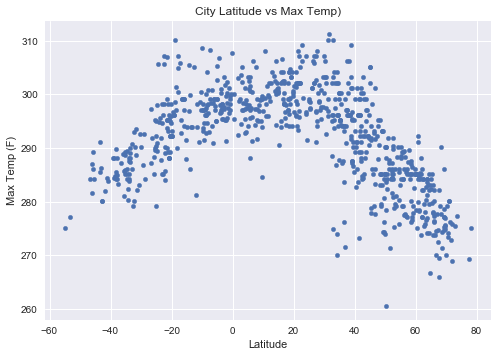

In [11]:
# Create scatter plot - Latitude vs Temperature
WorldCities_data.plot.scatter(["Lat"], ["Max Temp"], marker ='o', facecolors ="b", alpha = 1)

# Chart title
plt.title("City Latitude vs Max Temp)")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Max Temp (F)")

# Save an image of the chart and print to screen
plt.savefig("City Latitude vs Max Temp.png")
plt.show()

# Latitude vs Humidity Plot

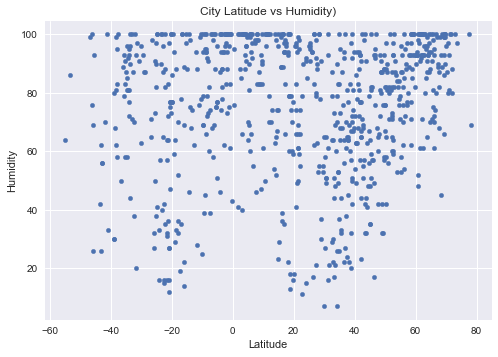

In [12]:
# Create scatter plot - Latitude vs Humidity
WorldCities_data.plot.scatter(["Lat"], ["Humidity"], marker ='o', facecolors ="b", alpha = 1)

# Chart title
plt.title("City Latitude vs Humidity)")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Humidity")

# Save an image of the chart and print to screen
plt.savefig("City Latitude vs Humidity.png")
plt.show()

# Latitude vs Cloudiness Plot¶

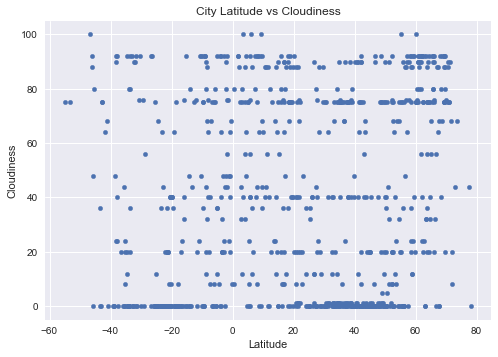

In [13]:
# Create scatter plot - Latitude vs Cloudiness
WorldCities_data.plot.scatter(["Lat"], ["Cloudiness"], marker ='o', facecolors ="b", alpha = 1)

# Chart title
plt.title("City Latitude vs Cloudiness")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Cloudiness")

# Save an image of the chart and print to screen
plt.savefig("City Latitude vs Cloudiness.png")
plt.show()

# Latitude vs Wind Speed Plot¶

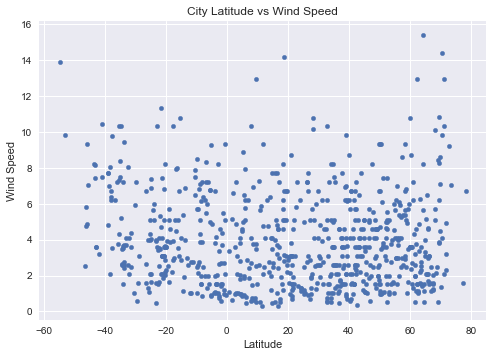

In [14]:
# Create scatter plot - Latitude vs Humidity
WorldCities_data.plot.scatter(["Lat"], ["Wind Speed"], marker ='o', facecolors ="b", alpha = 1)

# Chart title
plt.title("City Latitude vs Wind Speed")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Wind Speed")

# Save an image of the chart and print to screen
plt.savefig("City Latitude vs Wind Speed.png")
plt.show()